# Métodos III 

### *J.A. Hernando, Particle Physics Department, USC, 2018*   

## Appendix - Matplotlib - II

In [1]:
import time
print(' Last revision {}'.format(time.asctime()))

 Last revision Tue Jan 30 12:38:25 2018


## Matplotlib

Matplotlib is a Python library to display plots, graphs, histograms. 

There are excellent tutorials on the web that you can use:
* The matplotlib web page http://matplotlib.org/index.html
* Beautiful Python notes about Scipy and Matplotlib (http://www.scipy-lectures.org/index.html)
* Course for NEXT collaboration by F. Alted (https://github.com/FrancescAlted/Training-Next-Collaboration)

Items of this plt (matplotlib) shortcuts notebooks:

  1. Figures and layout
  2. Functions
  3. Histograms
  4. Miscellaneous  

In [2]:
# general imports
%matplotlib inline

In [3]:
# the general imports
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
# possible styles: ggplot (simplicity), bmh (scientify data), 
matplotlib.style.use('ggplot')

---
## 2. Functions


### 2.1 1D functions

#### Graphs

A 1D function is, $f(x): \mathcal{R} \to \mathcal{R}^n$, where $x \in [a, b]$ interval and $n = 1, 2, ...$. If $n=1$ is a scalar function and $n=2, 3, 4 $ is vectorial.  

A graph are the set of point $(x, f(x))$. 

plotting graphs of 1D functions, $f(x)$, using *plot* on *axis*.


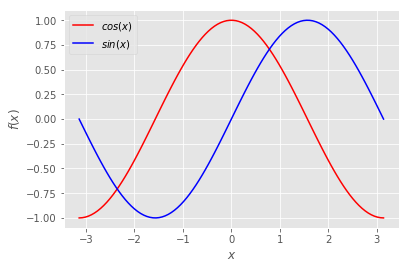

In [4]:
xs = np.linspace(-np.pi, np.pi, 100)

fig, ax = plt.subplots(figsize=(6,4))

ax.plot(xs, np.cos(xs), 'r', label=r'$cos(x)$')
ax.plot(xs, np.sin(xs), 'b', label=r'$sin(x)$')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$f(x)$')
ax.set_ylim([-1.1, 1.1])
ax.legend(loc=2);

#### Trayectories 

If the 1D is vectorial function, we can can draw it using the tools of *matplot3d* (http://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html). The main class is *Axis3D* that plays the same roll as *Axes* in 2D.

This is the example of how to draw a trayectory.


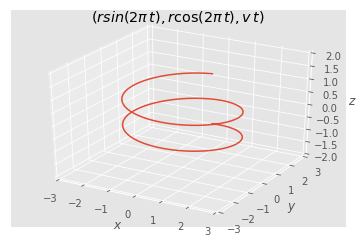

In [5]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1, projection='3d')
t = np.linspace(-1., 1., 100)
v, r = 1., 2.
z = v*t
x = r*np.sin(2.*np.pi*t)
y = r*np.cos(2.*np.pi*t)
ax.plot(x, y, z)
ax.set_xlim([-3., 3.])
ax.set_ylim([-3., 3.])
ax.set_zlim([-2., 2.])
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$z$');
ax.set_title(r'$(r sin(2\pi\,t), r \cos(2 \pi \, t), v \, t)$');

#### A trayectory in 4  dims
To draw function into 4D, $f(t)=(x, y, z, c)$ we can use the colors and the *scatter(x, y, z, c=)* color. 


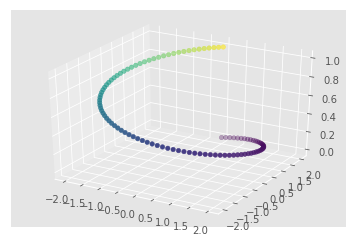

In [6]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1, projection='3d')
t = np.linspace(0., 1., 100)
v, r = 1., 2.
z = v*t
c = t*t
x = r*np.sin(2.*np.pi*t)
y = r*np.cos(2.*np.pi*t)
ax.scatter(x, y, z, c=c);

### 2.2 2D functions 

#### Contours

To deal with 2D functions, $f(x, y)$, $is convenient to have the $x$ and $y$ coordinate vectors as *meshgrid* numpy objects, where the *x* vector as many columns and *y*, all columns are identical and contain the *x* vector. Funtions defined with messgrid objects have the same syntax than the 'math' functions


First we create a meshgrid with the vector coordinates *xs, ys*, the mess grid are two 2D arrays, *mxs, mys*, where the x-elements are repeated along the *y-coordinates* for *mxs* and similar for *mys*. This helps numpy to do calculaton with arrays for computing 2D functions. Meshgrid can be in cartesian 'xy' or indexed 'ij', using the *indexing* argument of *meshgrid*.

To generate a contour with lines use *contour( xmgrid, ymgrid, zmgrid, nlevels)*, with *contourf()* the countour is filled. The methods admits several keyworkds: *alpha*, for the transparency, *cmap* for the color map, or *colors* for a color or list of colors.

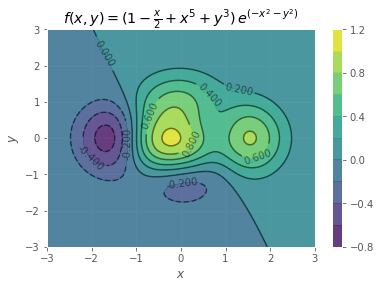

In [7]:
fig, ax = plt.subplots(figsize=(6,4))

def f(x, y):
    return (1 - x / 2 + x ** 5 + y ** 3) * np.exp(-x ** 2 -y ** 2)
rsf = r"$f(x,y) = (1-\frac{x}{2} + x^5 + y^3) \, e^{(-x^2-y^2)}$"

xs = np.linspace(-3., 3., 100)
ys = np.linspace(-3., 3., 100)
mxs, mys = np.meshgrid(xs, ys)

# color fill contour
c0 = ax.contourf(mxs, mys, f(mxs, mys), 10, alpha=0.8, cmp=plt.cm.jet)
# lines contour
c1 = ax.contour(mxs, mys, f(mxs, mys), 10, colors='black', alpha=0.5, linewidth=.25);
c1.clabel(fontsize=10, inline=1)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_title(rsf)
fig.colorbar(c0, ax=ax);

#### arrays

A numpy array can be displayed using the *imShow()* method of *axes*. The numpy array can be associated to a 2-dimensional function or to an image. *imsShow()* has several keywords: *cmap* for the color map, *interpolation=nearest*. 

There are several colormap scales available (see http://matplotlib.org/users/colormaps.html). To render the colormap associated to the image, you can use the *colormap()* method of *figure* and indicate the image and the sublplot.


/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


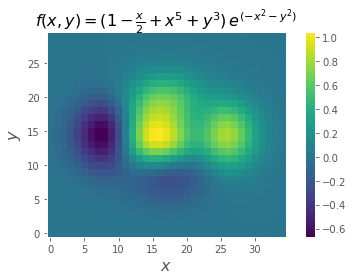

In [8]:
fig, ax = plt.subplots(figsize=(6,4))

rsf = r"$f(x,y) = (1-\frac{x}{2} + x^5 + y^3) \, e^{(-x^2-y^2)}$"
def f(x, y):
    return (1 - x / 2 + x ** 5 + y ** 3 ) * np.exp(-x ** 2 - y ** 2)

n = 10
x = np.linspace(-3, 3, 3.5 * n)
y = np.linspace(-3, 3, 3.0 * n)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

ax.grid(False)
ct = ax.imshow(Z, interpolation='nearest', origin='lower')
ax.set_xlabel(r'$x$', fontsize=16)
ax.set_ylabel(r'$y$', fontsize=16)
ax.set_title(rsf, fontsize=16)
fig.colorbar(ct, ax=ax);
fig.tight_layout()

#### Graphics

The 3D graphics are controlled via the *Axes3D* class in *mpl_toolhits.mplot3d* namespace.

There is the possibility of plotting the contours on an axis. See the following example:


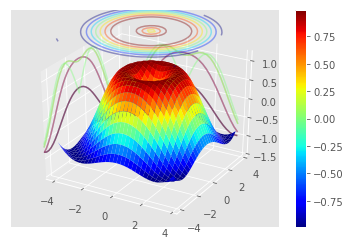

In [9]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')

# ax is a Axes3D object
xs = np.arange(-4, 4, 0.25)
ys = np.arange(-4, 4, 0.25)
mxs, mys = np.meshgrid(xs, ys)
mzs = np.sqrt(mxs ** 2 + mys ** 2)
mzs = np.sin(mzs)

# cmap = plt.cm.hot
# other colormaps: plt.cm.jet, plt.cm.warmhot, plt.cm.Blues, plt.cm.plasma
cmap = plt.cm.jet
ct = ax.contour(mxs, mys, mzs, zdir='z', offset=2., alpha=0.4, cmap=cmap)
ct = ax.contour(mxs, mys, mzs, zdir='x', offset=-5, alpha=0.4, cmap=cmap)
ct = ax.contour(mxs, mys, mzs, zdir='y', offset=4, alpha=0.4, cmap=cmap)
# rstride are the width or the row, cstride the width of the columns (in units!)
sf = ax.plot_surface(mxs, mys, mzs, rstride=1, cstride=1, alpha=1., cmap=cmap)
ax.set_zlim(-1.5, 1.2);
fig.colorbar(sf, ax=ax);

# plt.show()

### 3. Histograms

#### 3.1 1D histograms

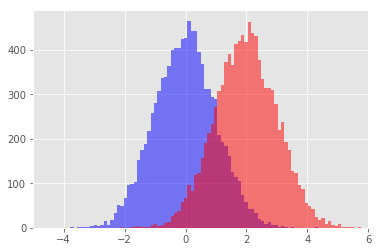

In [10]:
fig, ax = plt.subplots()

xs = np.random.normal(0, 1, 10000)
ys = np.random.normal(2, 1, 10000)
#xbins, vals = np.histogram(xs)
ax.hist(xs, bins=100, range=(-5., 6.), color='blue', alpha=0.5)
ax.hist(ys, bins=100, range=(-5., 6.), color='red', alpha=0.5)
ax.set_xlim((-5., 6.));

We can also call the *hist* function of numpy and them plot the bins and contents arrays.

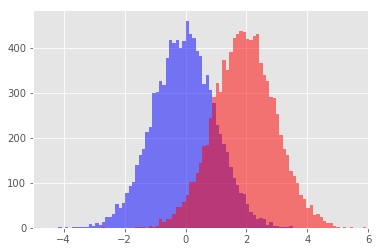

In [11]:
fig, ax = plt.subplots()

xs = np.random.normal(0, 1, 10000)
ys = np.random.normal(2, 1, 10000)
counts, xedges = np.histogram(xs, bins=100, range=(-5., 6.))
ax.bar(xedges[:-1], counts, width=(xedges[1]-xedges[0]), color='blue', alpha=0.5)
counts, xedges = np.histogram(ys, bins=100, range=(-5, 6.))
ax.bar(xedges[:-1], counts, width=(xedges[1]-xedges[0]), color='red', alpha=0.5)
ax.set_xlim((-5., 6.));

#### 3.2 2D histograms

And a 2D histograms

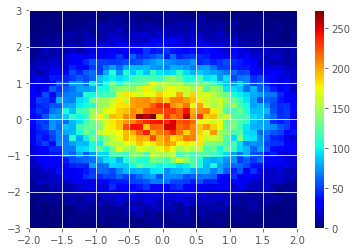

In [12]:
fig, ax = plt.subplots()

xs = np.random.normal(0, 1, 100000)
ys = np.random.normal(0, 1, 100000)

borders=np.array(((-2., 2.), 
                  (-3., 3.)))

counts, xedges, yedges, img = ax.hist2d(xs, ys, bins=40, range=borders, cmap=plt.cm.jet)
fig.colorbar(img, ax=ax);

Or using *histogram2d()* function of *numpy*.

Two possibilities: either as an image, using *imshow()* or as a *pcolormesh()*.

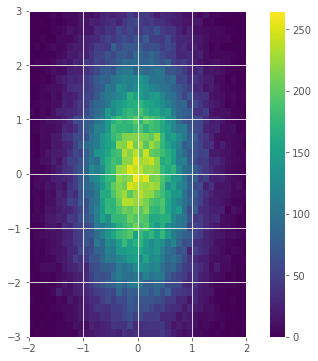

In [13]:
fig, ax = plt.subplots(figsize=(8, 6))

xs = np.random.normal(0, 1, 100000)
ys = np.random.normal(0, 1, 100000)

borders=np.array(((-2., 2.), 
                  (-3., 3.)))

counts, xedges, yedges = np.histogram2d(xs, ys, bins=40, range=borders)

img = ax.imshow(counts, interpolation='none', origin='low', 
                extent=(xedges[0], xedges[-1], yedges[0], yedges[-1]))
fig.colorbar(img, ax=ax);

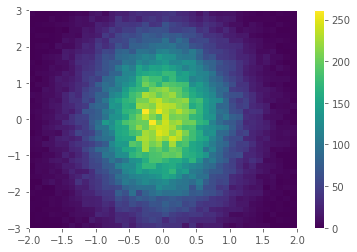

In [14]:
fig, ax = plt.subplots(figsize=(6, 4))

xs = np.random.normal(0, 1, 100000)
ys = np.random.normal(0, 1, 100000)

borders=np.array(((-2., 2.), 
                  (-3., 3.)))

counts, xedges, yedges = np.histogram2d(xs, ys, bins=40, range=borders)

mxs, mys = np.meshgrid(xedges, yedges)

img = ax.pcolormesh(mxs, mys, counts)
fig.colorbar(img, ax=ax);

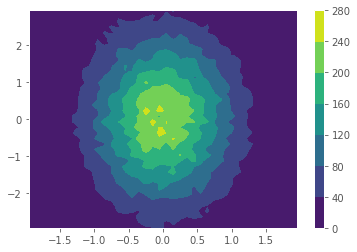

In [15]:
fig, ax = plt.subplots()

xcenters = (xedges[1:]+xedges[:-1])/2
ycenters = (yedges[1:]+yedges[:-1])/2
mxs, mys = np.meshgrid(xcenters, ycenters)

sf = ax.contourf(mxs, mys, counts)
fig.colorbar(sf, ax=ax);

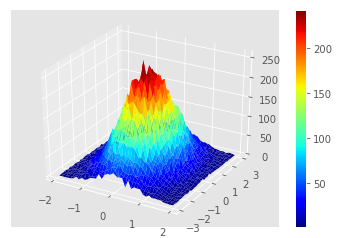

In [16]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')

xcenters = (xedges[1:]+xedges[:-1])/2
ycenters = (yedges[1:]+yedges[:-1])/2
mxs, mys = np.meshgrid(xcenters, ycenters)

sf = ax.plot_surface(mxs, mys, counts, rstride=1, cstride=1, cmap=plt.cm.jet)
fig.colorbar(sf, ax=ax);

## 4. Miscellaneous: graphs, pies and scatters

### bars

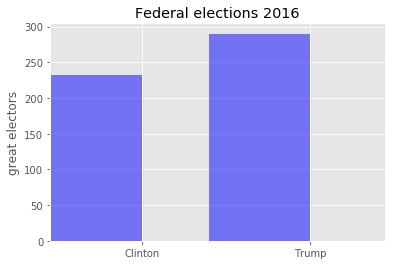

In [17]:
fig, ax = plt.subplots()

index = np.arange(2)
electors = [232, 290]
names = ['Clinton', 'Trump']
width = 0.6

ax.bar(index, electors, width=width, color='Blue', alpha=0.5)
ax.set_xticks(index+0.5*width)
ax.set_xticklabels(names)
ax.set_title('Federal elections 2016')
ax.set_ylabel('great electors')
ax.set_xlim(-0.25, 1.75);

### Pies

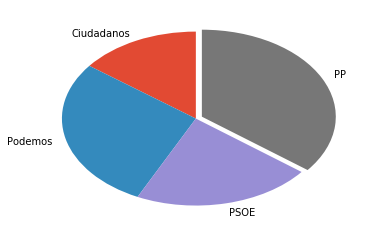

In [18]:
fig, ax = plt.subplots()

data = {'Ciudadanos': 8.2, 'Podemos': 15.8, 'PSOE': 12.13, 'PP': 19.9 }
labels = data.keys()
values = [data[label] for label in labels]
explode = [0., 0., 0., 0.05]
ax.pie(values, labels=labels, explode=explode, shadow=False, startangle=90);

### plots with errors

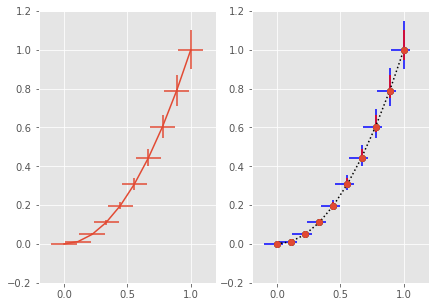

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(7, 5))

#axs.ravel()

xs = np.linspace(0., 1., 10)
ys = xs*xs
eys = ys/10.
exs = np.ones(10)*0.1

ax0 = axs[0]
ax0.errorbar(xs, ys, xerr=exs, yerr=eys)
ax0.set_xlim((-0.2, 1.2))
ax0.set_ylim((-0.2, 1.2))

ax1 = axs[1]
ax1.errorbar(xs, ys, xerr=(exs, 0.5*exs), yerr=(eys, 1.5*eys), fmt='o:', color='black', 
             ecolor='blue')
ax1.errorbar(xs, ys, yerr=(0.5*eys, 1.*eys), ecolor='red', fmt='o')
ax1.set_xlim((-0.2, 1.2))
ax1.set_ylim((-0.2, 1.2));

#### Bars and pies

### Scatters

Scatter plots simply plot xs vs ys items!

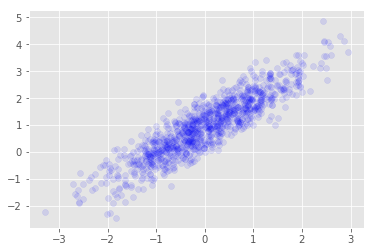

In [20]:
fig, ax = plt.subplots()

xs = np.random.normal(0., 1, 1000)
ys = xs+np.random.normal(1., 0.5, 1000)

ax.scatter(xs, ys, color='blue', alpha=0.1);

#### 3D scatter plots

This is an example of a 3D scatter. Notice that we use the *c* color argument to set a 4D coordinate!

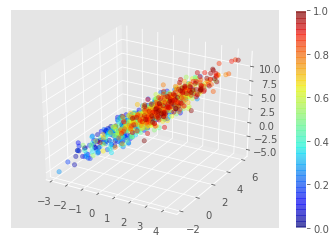

In [21]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')

nn = 1000
ts = np.linspace(0., 1., nn)
xs = 2.*ts+np.random.normal(0., 1, nn)
ys = xs+np.random.normal(1., 0.5, nn)
zs = xs+ys+np.random.normal(1., 1., nn)

ct = ax.scatter(xs, ys, zs, c=ts, alpha=0.4, cmap=plt.cm.jet);
fig.colorbar(ct, ax=ax);

#### Using scatter plots to draw trayectories in 4D and 5D

We can use scatter 3D to draw trayectories. *scatter()* admits as argument *c* colors and *s* size of the markers. With these two options we can draw 4D trayectories (c is the 4-component, i.e time) and the size can provide the 5th component.

This is an example:

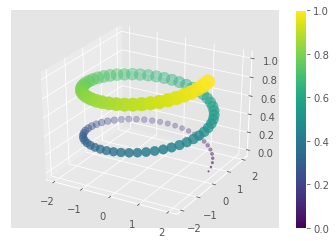

In [22]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')

t = np.linspace(0., 1., 100)
r, v, w = 2., 1., 4.*np.pi
xs = r*np.cos(w*t)
ys = r*np.sin(w*t)
zs = v*t

color = t
size = 200.*t

ct = ax.scatter(xs, ys, zs, c=t, s=size)
fig.colorbar(ct, ax=ax);